In [1]:
# 필요 라이브러리 및 파일 불러오기
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import *
import seaborn as sns

train = pd.read_csv("california_housing_train.csv") 
test = pd.read_csv("california_housing_test.csv")

### 자주 쓰이고 중요한 그래프
* 산점도
* 히스토그램
* 막대그래프
* 박스플롯

### 실습. 박스 플롯을 3x3 로 그려보기
* test, train 데이터 이용

In [2]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [3]:
test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

<AxesSubplot:xlabel='median_income'>

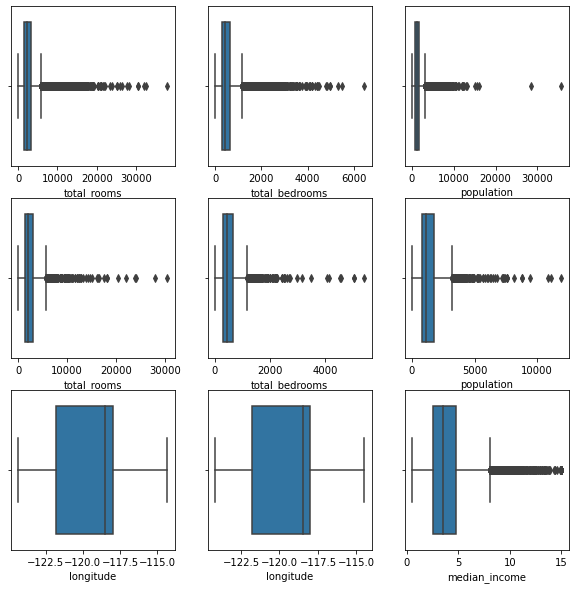

In [4]:
plt.figure(figsize=(10,10))

plt.subplot(3,3,1)
sns.boxplot(x='total_rooms',data=train)
plt.subplot(3,3,2)
sns.boxplot(x='total_bedrooms',data=train)
plt.subplot(3,3,3)
sns.boxplot(x='population',data=train)
plt.subplot(3,3,4)
sns.boxplot(x='total_rooms',data=test)
plt.subplot(3,3,5)
sns.boxplot(x='total_bedrooms',data=test)
plt.subplot(3,3,6)
sns.boxplot(x='population',data=test)
plt.subplot(3,3,7)
sns.boxplot(x='longitude',data=train)
plt.subplot(3,3,8)
sns.boxplot(x='longitude',data=test)
plt.subplot(3,3,9)
sns.boxplot(x='median_income',data=train)


In [7]:
train.total_rooms.describe()

count    17000.000000
mean      2643.664412
std       2179.947071
min          2.000000
25%       1462.000000
50%       2127.000000
75%       3151.250000
max      37937.000000
Name: total_rooms, dtype: float64

(array([1.4237e+04, 2.2480e+03, 3.4800e+02, 8.7000e+01, 5.0000e+01,
        1.7000e+01, 6.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([2.00000e+00, 3.79550e+03, 7.58900e+03, 1.13825e+04, 1.51760e+04,
        1.89695e+04, 2.27630e+04, 2.65565e+04, 3.03500e+04, 3.41435e+04,
        3.79370e+04]),
 <BarContainer object of 10 artists>)

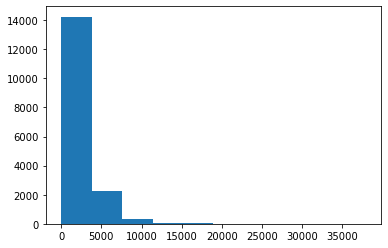

In [8]:
plt.hist(train.total_rooms)

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

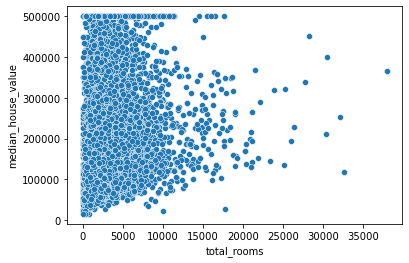

In [9]:
sns.scatterplot(x=train.total_rooms,y=train.median_house_value)

### 전체 방의 수를 기준으로 네 그룹으로 나눠보기
* A1 : 75% ~ 100% 3151 ~
* A2 : 50% ~ 75% 2127 ~ 3151
* A3 : 25% ~ 50% 1462 ~ 2127
* A4 : 0% ~ 25% ~ 1462

### 데이터 선택하기
* [데이터]loc[행, 열]
* [데이터]loc[조건, 열]
* [데이터][조건]

In [10]:
tmp_A1 = train[train['total_rooms'] > 3151]
tmp_A1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
10,-114.60,33.62,16.0,3741.0,801.0,2434.0,824.0,2.6797,86500.0
38,-115.48,32.68,15.0,3414.0,666.0,2097.0,622.0,2.3319,91200.0
...,...,...,...,...,...,...,...,...,...
16949,-124.15,41.81,17.0,3276.0,628.0,3546.0,585.0,2.2868,103100.0
16986,-124.19,40.73,21.0,5694.0,1056.0,2907.0,972.0,3.5363,90100.0
16987,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0
16988,-124.21,41.75,20.0,3810.0,787.0,1993.0,721.0,2.0074,66900.0


In [11]:
boolean=np.where((train['total_rooms']>2127) & (train['total_rooms'] <= 3151), True, False)
boolean

array([False, False, False, ...,  True,  True, False])

In [12]:
temp_A2=train[boolean]
temp_A2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
13,-114.61,34.83,31.0,2478.0,464.0,1346.0,479.0,3.2120,70400.0
15,-114.65,34.89,17.0,2556.0,587.0,1005.0,401.0,1.6991,69100.0
42,-115.49,32.67,25.0,2322.0,573.0,2185.0,602.0,1.3750,70100.0
45,-115.50,32.67,35.0,2159.0,492.0,1694.0,475.0,2.1776,75500.0
...,...,...,...,...,...,...,...,...,...
16993,-124.23,40.54,52.0,2694.0,453.0,1152.0,435.0,3.0806,106700.0
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0


In [13]:
boolean_3=np.where((train['total_rooms']>1462) & (train['total_rooms'] <= 2127), True, False)
temp_A3=train[boolean_3]
temp_A3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0
11,-114.60,33.60,21.0,1988.0,483.0,1182.0,437.0,1.6250,62000.0
16,-114.65,33.60,28.0,1678.0,322.0,666.0,256.0,2.9653,94900.0
20,-114.68,33.49,20.0,1491.0,360.0,1135.0,303.0,1.6395,44400.0
...,...,...,...,...,...,...,...,...,...
16975,-124.17,40.76,26.0,1776.0,361.0,992.0,380.0,2.8056,82800.0
16977,-124.17,40.62,32.0,1595.0,309.0,706.0,277.0,2.8958,86400.0
16978,-124.18,40.79,39.0,1836.0,352.0,883.0,337.0,1.7450,70500.0
16980,-124.18,40.78,34.0,1592.0,364.0,950.0,317.0,2.1607,67000.0


In [14]:
boolean_4=np.where((train['total_rooms']<=1462), True, False)
temp_A4=train[boolean_4]
temp_A4

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
12,-114.61,34.84,48.0,1291.0,248.0,580.0,211.0,2.1571,48600.0
...,...,...,...,...,...,...,...,...,...
16982,-124.18,40.62,35.0,952.0,178.0,480.0,179.0,3.0536,107000.0
16984,-124.19,40.78,37.0,1371.0,319.0,640.0,260.0,1.8242,70000.0
16989,-124.21,40.75,32.0,1218.0,331.0,620.0,268.0,1.6528,58100.0
16992,-124.23,40.81,52.0,1112.0,209.0,544.0,172.0,3.3462,50800.0
